<a href="https://colab.research.google.com/github/HoanDiep/BT9_tuan10/blob/main/cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar100
from keras.models import Sequential
import matplotlib.pyplot as plt

(x_trains, y_trains) ,(x_test, y_test) = cifar100.load_data()

In [ ]:
x_trains.shape


(50000, 32, 32, 3)

In [ ]:
y_trains.shape

(50000, 1)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
x_trains = x_trains.reshape(50000,32*32*3)
x_test = x_test.reshape(10000,32*32*3)

In [ ]:
from numpy import float32
x_trains = x_trains.astype('float32')/255
x_test = x_test.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
y_trains = to_categorical(y_trains,100)
y_test = to_categorical(y_test,100)

In [ ]:
from keras.layers import Dense
model = Sequential()
model.add(Dense(1024,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(256,activation ='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 100)               12900     
                                                                 
Total params: 3,848,676
Trainable params: 3,848,676
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_trains,y_trains,epochs=100,batch_size=32)
test_loss,test_acc=model.evaluate(x_test,y_test)

print('test_acc:',test_acc)
print('test_loss:',test_loss)

Epoch 1/100
1563/1563 [==============================] - 8s 4ms/step - loss: 4.5694 - accuracy: 0.0127
Epoch 2/100
1563/1563 [==============================] - 6s 4ms/step - loss: 4.1400 - accuracy: 0.0543
Epoch 3/100
1563/1563 [==============================] - 7s 5ms/step - loss: 3.9593 - accuracy: 0.0801
Epoch 4/100
1563/1563 [==============================] - 7s 4ms/step - loss: 3.8558 - accuracy: 0.0943
Epoch 5/100
1563/1563 [==============================] - 7s 5ms/step - loss: 3.8080 - accuracy: 0.1034
Epoch 6/100
1563/1563 [==============================] - 7s 5ms/step - loss: 3.7793 - accuracy: 0.1079
Epoch 7/100
1563/1563 [==============================] - 7s 4ms/step - loss: 3.7531 - accuracy: 0.1121
Epoch 8/100
1563/1563 [==============================] - 6s 4ms/step - loss: 3.7248 - accuracy: 0.1149
Epoch 9/100
1563/1563 [==============================] - 7s 4ms/step - loss: 3.6972 - accuracy: 0.1203
Epoch 10/100
1563/1563 [==============================] - 6s 4ms/step - l

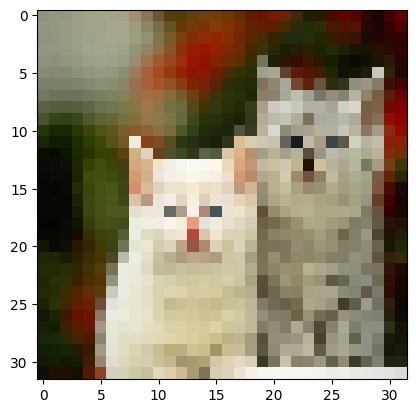

In [ ]:
from keras.utils import load_img
import matplotlib.pyplot as plt
img = load_img('meo1.jpg',target_size=(32,32))
plt.imshow(img)

In [ ]:
import numpy as np
from keras.utils.image_utils import img_to_array
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

1/1 [==============================] - 0s 83ms/step


array([38])

In [ ]:
model.save('model_cifar100.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp model_cifar100.h5 "/content/drive/My Drive/Colab Notebooks/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
